### Author: Vaishnavi Adhav

## Visualization of the tropical cyclone Idalia path in US

Hurricane Idalia was a powerful and destructive hurricane that caused significant damage across parts of the southeastern United States, especially in North Florida, in late August 2023. The tenth named storm, third hurricane, and second major hurricane of the 2023 Atlantic hurricane season, Idalia formed from a low-pressure area that crossed Central America from the eastern Pacific Ocean.

This tutorial will help you to find out where it came from, when and where it got stronger and understand more about this natural disaster and analyze it in Python.

Position history for tropical cyclone Idalia (csv): https://flhurricane.com/cyclone/stormhistory.php?storm=10&year=2023

US map geospatial data (geojson): https://eric.clst.org/tech/usgeojson/

In [150]:
 # load all important packages

# geopandas > extends the datatypes used by pandas to allow spatial operations on geometric types
import geopandas

# numpy > a fundamental package for scientific computing with Python
import numpy as np

# pandas > provide data structures and data analysis tools
import pandas as pd

# shapely > geometric objects, predicates, and operations
from shapely.geometry import Point

# missingno > missing data visualization module for Python
import missingno as msn

# below are the data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [151]:
# read and understand geojson file

country = geopandas.read_file("D:\Geospatial-Projects\Hurricane-path-prediction\gz_2010_us_040_00_500k.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."


In [152]:
# check the type of the dataframe

type(country)

geopandas.geodataframe.GeoDataFrame

In [153]:
# check the data type of the column containing coordinates

type(country.geometry)

geopandas.geoseries.GeoSeries

In [154]:
type(country.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

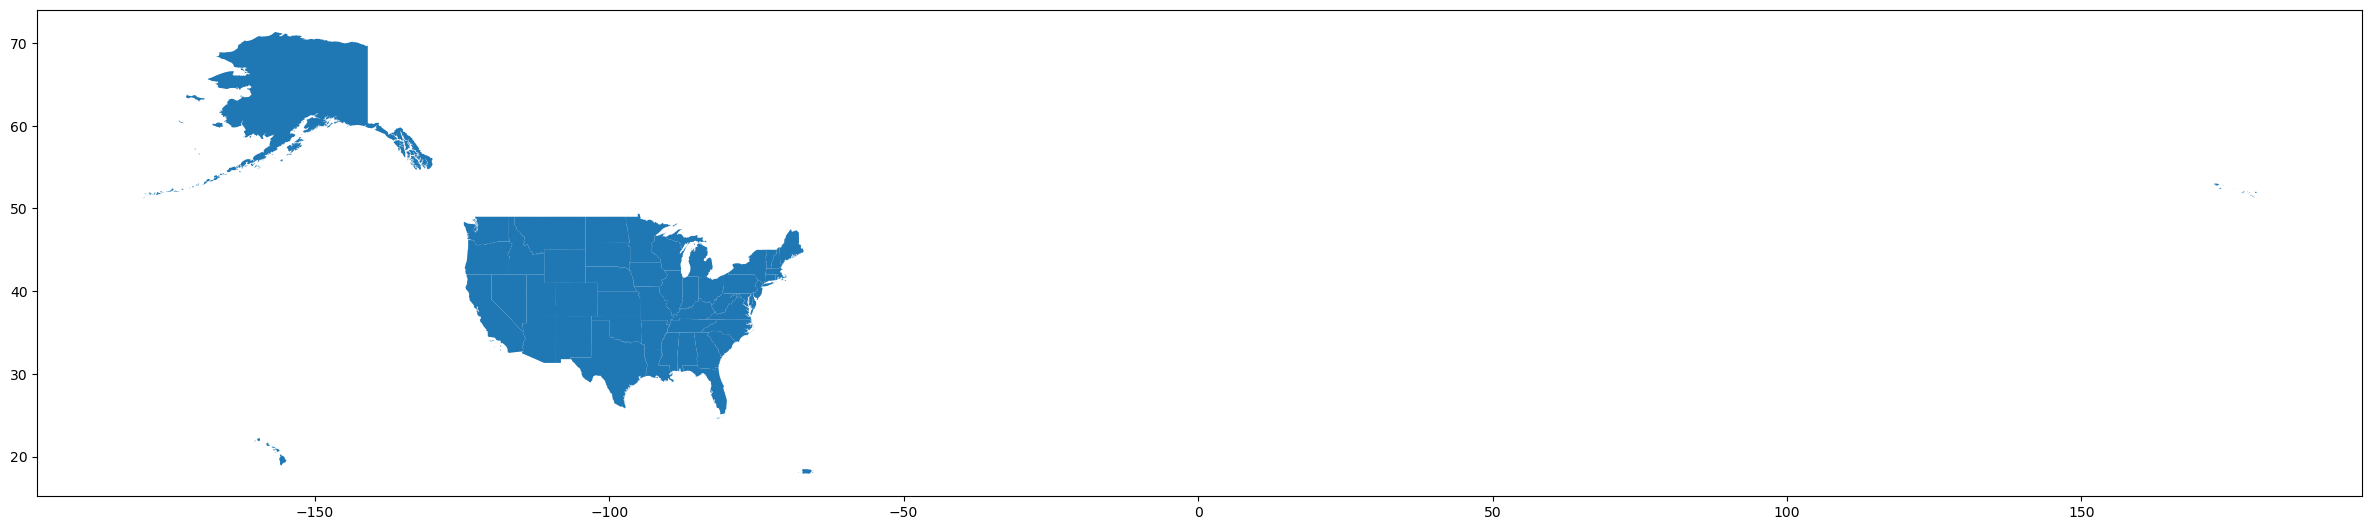

In [155]:
# Setup figure and axis with different size
f, ax = plt.subplots(1, figsize=(30, 20))

# Add layer of polygons on the axis
country.plot(ax=ax)

# Display
plt.show()


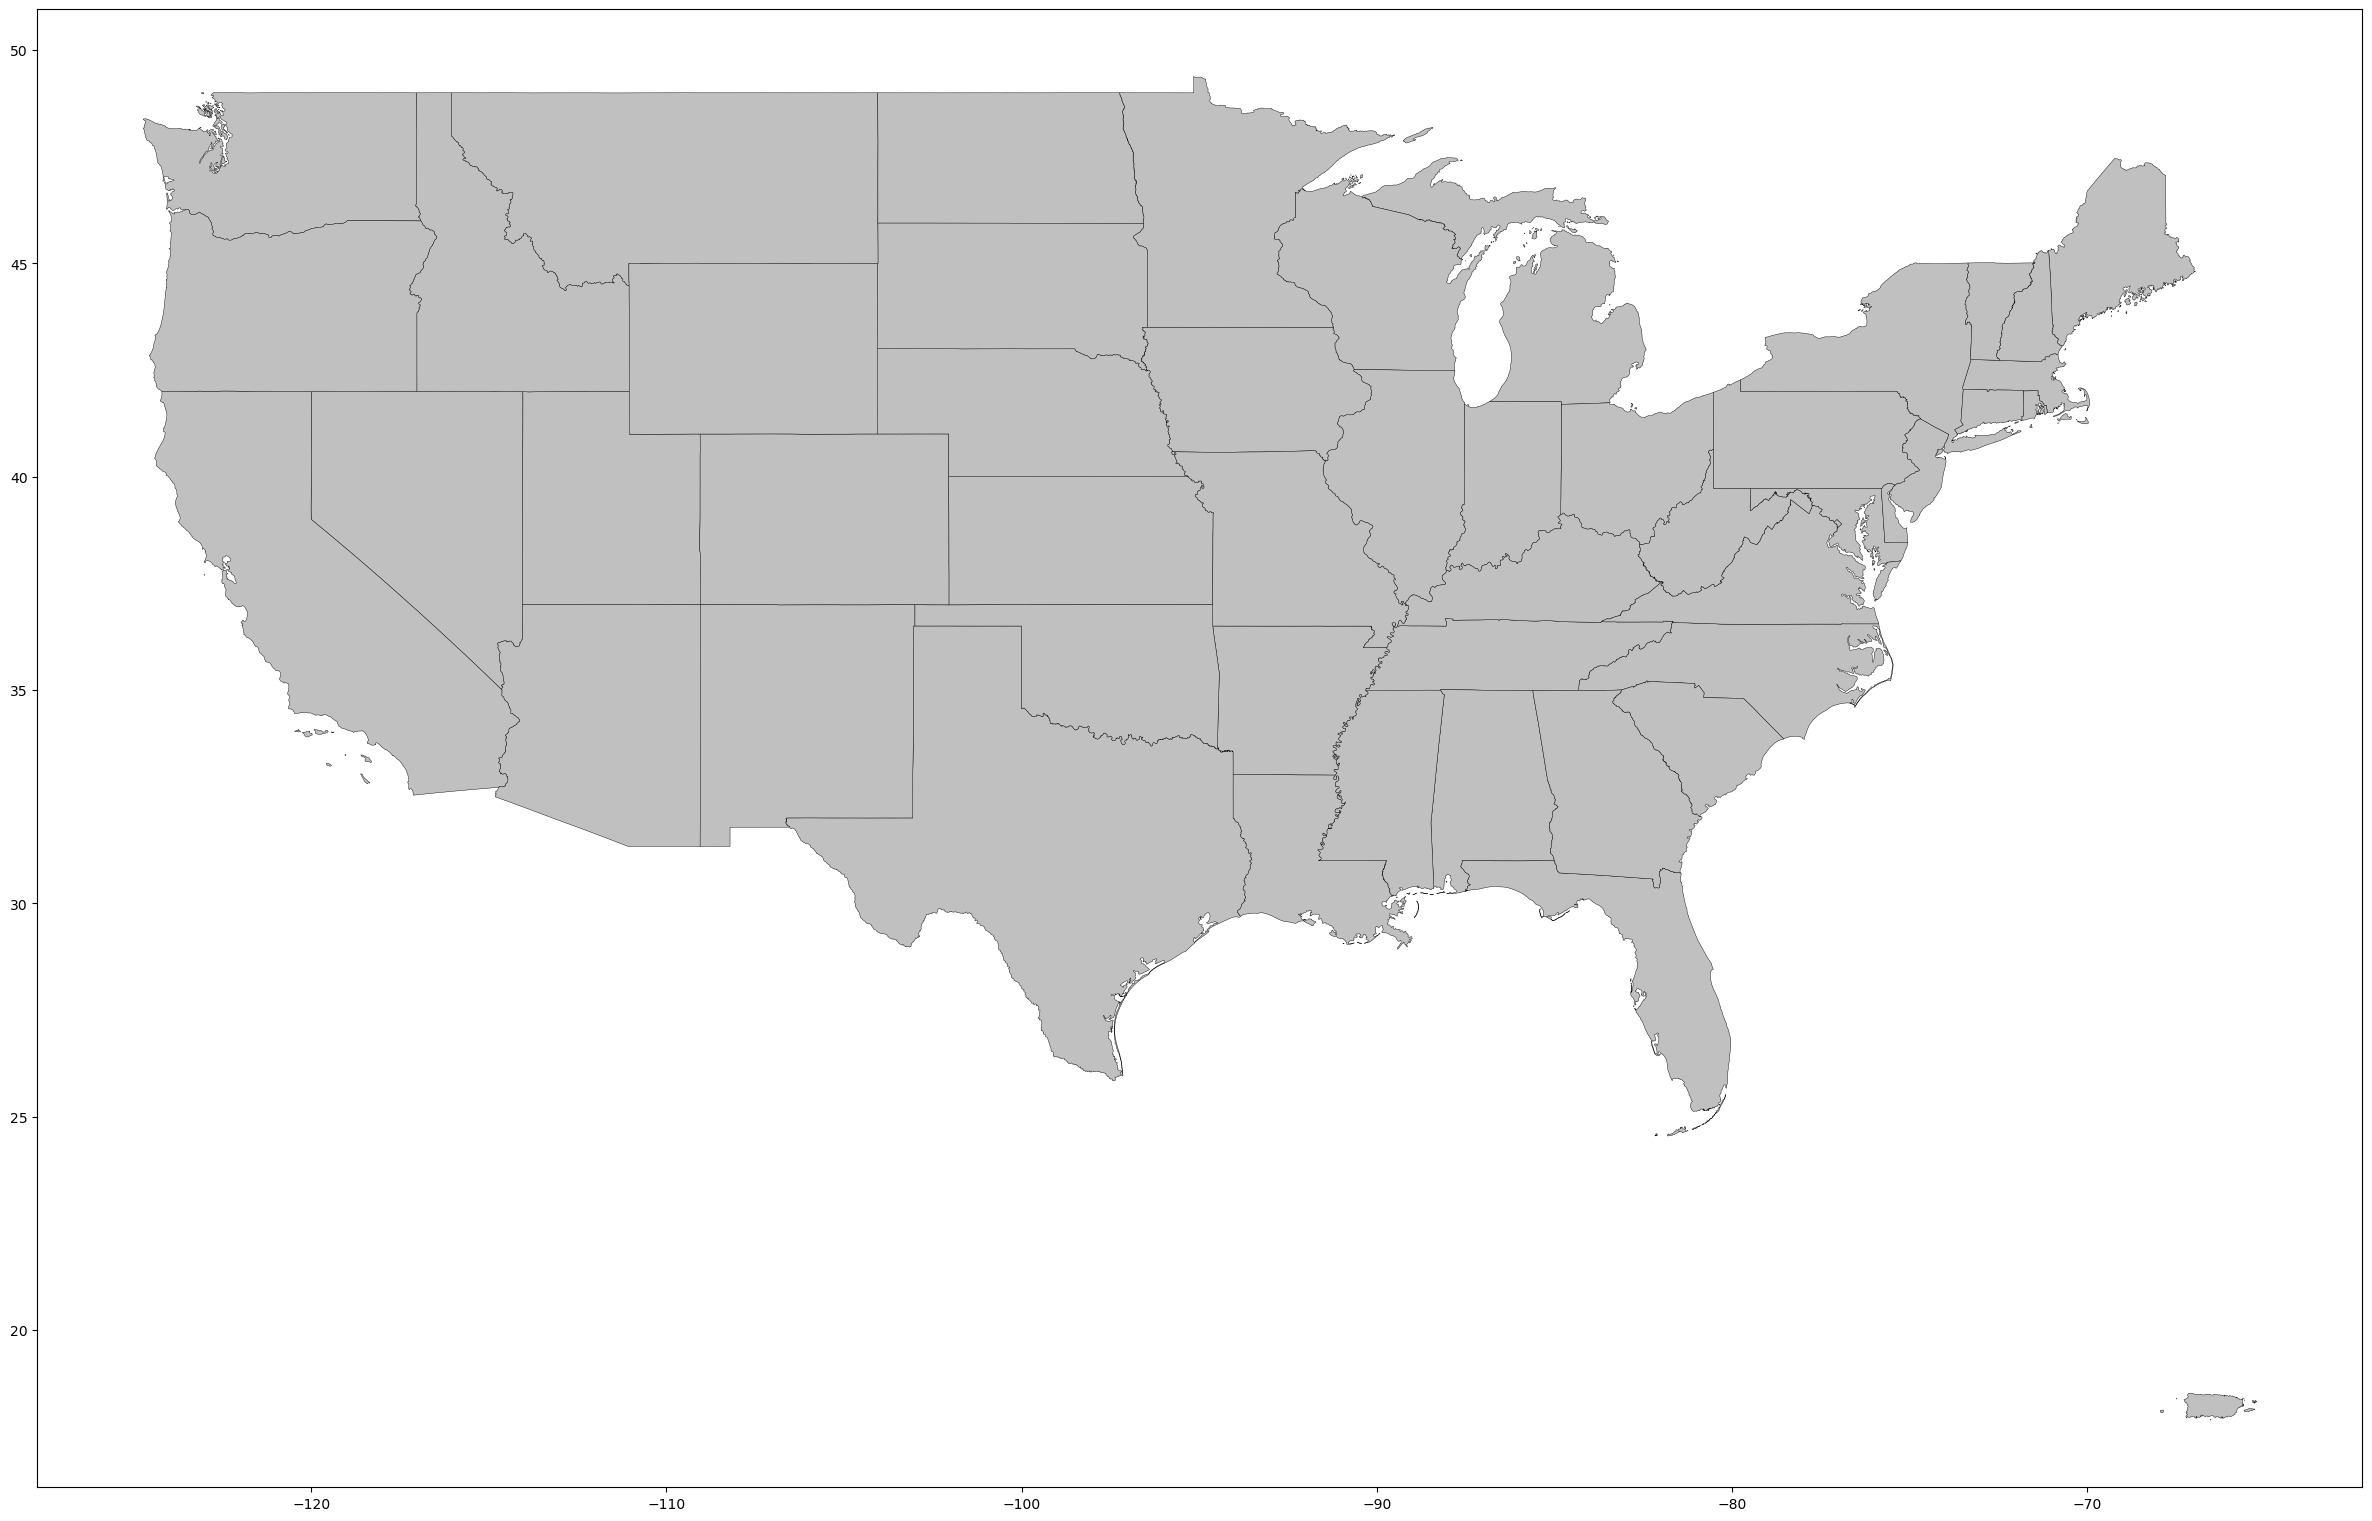

In [156]:
# exclude Alaska and Hawaii for now as the hurricane did not go anywhere near those two states

us = country[country['NAME'].isin(['Alaska','Hawaii']) == False]
us.plot(figsize=(30,20), linewidth=0.3, facecolor='silver', edgecolor='black')
plt.show()

In [157]:
# load in hurricane data

idalia = pd.read_csv(r"D:\Geospatial-Projects\Hurricane-path-prediction\tropical-cyclone-idalia-data.csv")
idalia.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,08/26/2023 17:00,21.1,81.6,30,1006,Stationary,Tropical Depression,TEN,08/26/2023 16:54,Pasch
1,1A,08/26/2023 20:00,21.2,86.2,30,1005,NW at 1 MPH (315 deg),Tropical Depression,TEN,08/26/2023 19:51,Berg
2,2,08/26/2023 23:00,21.1,86.4,35,1005,SW at 2 MPH (230 deg),Tropical Depression,TEN,08/26/2023 22:51,Berg
3,2A,08/27/2023 02:00,20.7,86.8,35,1001,SW at 5 MPH (230 deg),Tropical Depression,TEN,08/27/2023 02:11,Blake
4,3,08/27/2023 05:00,20.1,86.8,35,1001,S at 5 MPH (180 deg),Tropical Depression,TEN,08/27/2023 05:12,Blake


### Exploratory Data Analysis

In [158]:
# check the information, data type

idalia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AdvisoryNumber  57 non-null     object 
 1   Date            57 non-null     object 
 2   Lat             57 non-null     float64
 3   Long            57 non-null     float64
 4   Wind            57 non-null     int64  
 5   Pres            57 non-null     int64  
 6   Movement        57 non-null     object 
 7   Type            57 non-null     object 
 8   Name            57 non-null     object 
 9   Received        57 non-null     object 
 10  Forecaster      57 non-null     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 5.0+ KB


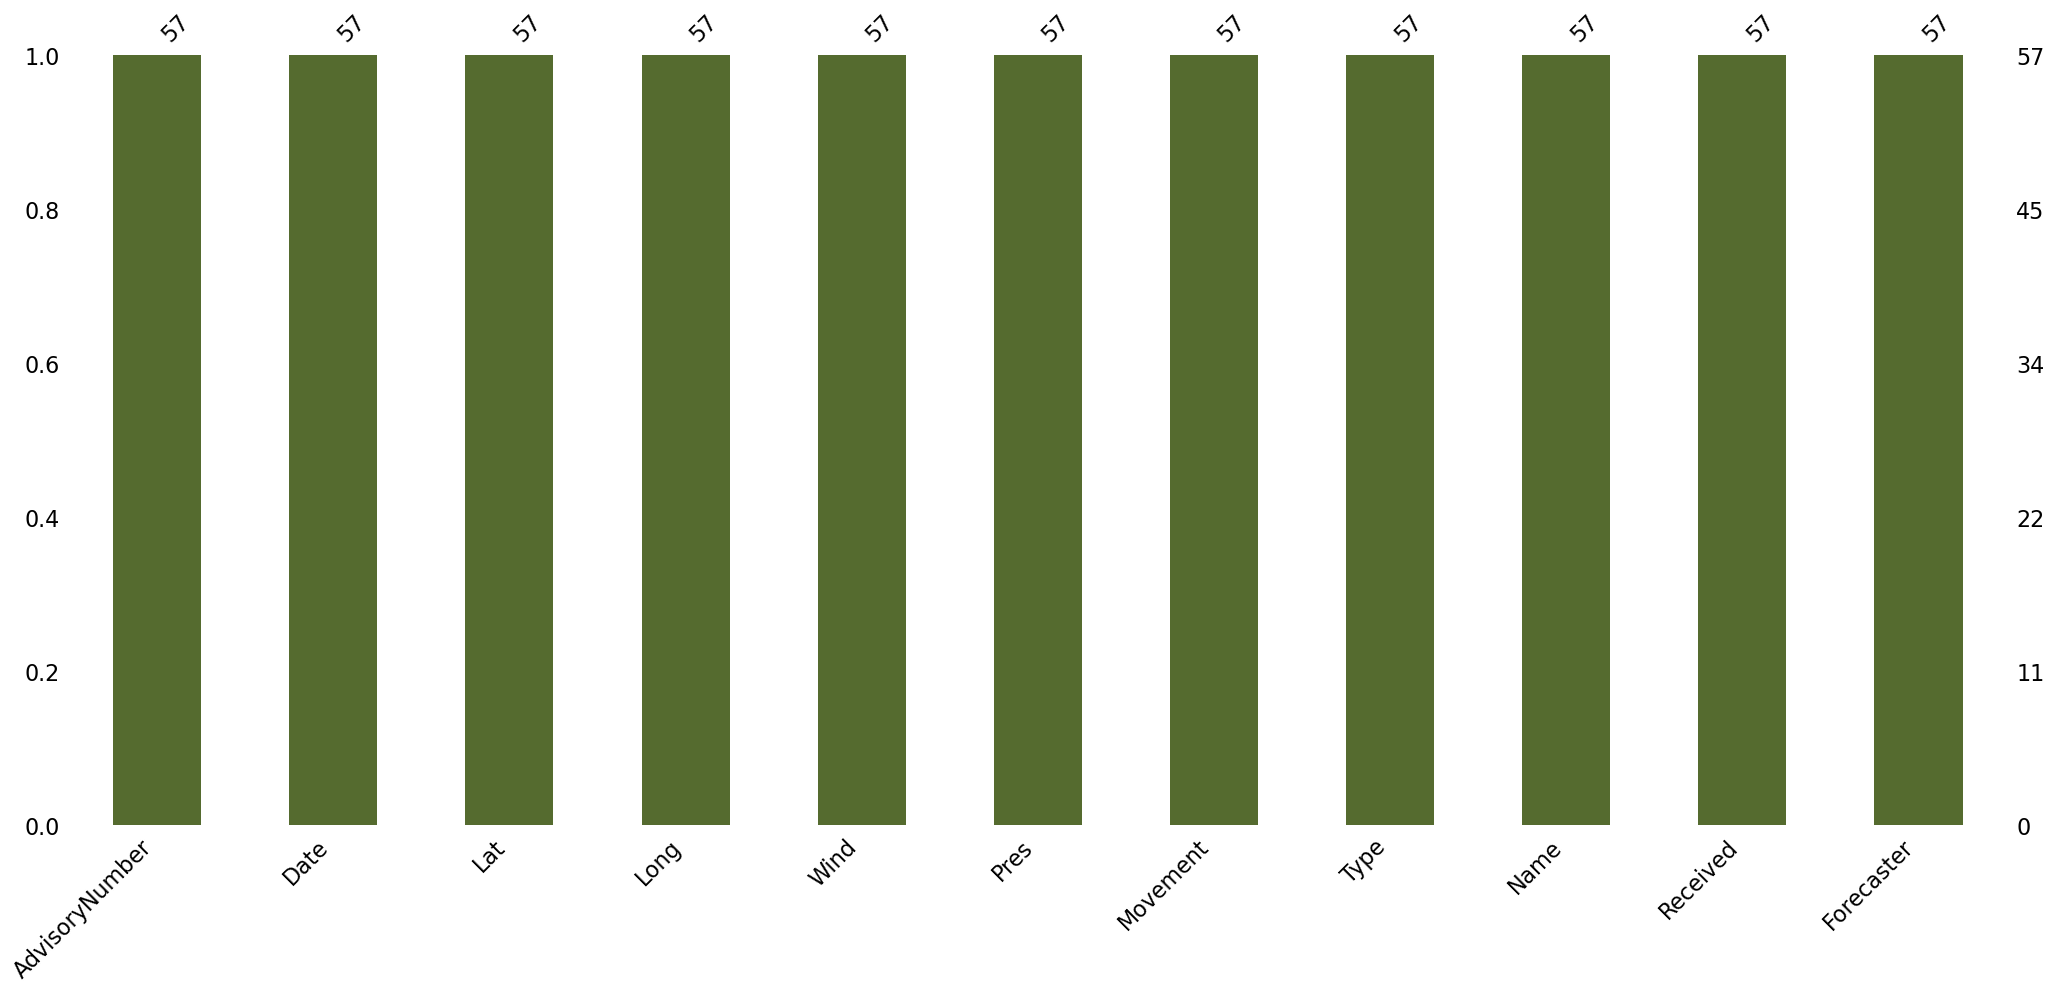

In [159]:
# check missing values
# Notice you can always adjust the color of the visualization

msn.bar(idalia, color='darkolivegreen');

In [160]:
# statistical information, some could be very useful such as mean wind speed, maximum and minimum wind speed of this hurricane, etc.

idalia.describe()

,Lat,Long,Wind,Pres
count,57.000000,57.000000,57.000000,57.000000
mean,27.108772,78.789474,63.421053,989.526316
std,5.534350,8.208699,21.089899,13.351171
min,19.700000,62.700000,30.000000,940.000000
25%,21.100000,71.500000,50.000000,984.000000
50%,29.100000,83.500000,60.000000,994.000000
75%,32.000000,85.200000,70.000000,999.000000
max,33.700000,86.800000,130.000000,1006.000000


In [161]:
# dropping all unused features:

idalia = idalia.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
idalia.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/26/2023 17:00,21.1,81.6,30,1006,Stationary,Tropical Depression,TEN
1,08/26/2023 20:00,21.2,86.2,30,1005,NW at 1 MPH (315 deg),Tropical Depression,TEN
2,08/26/2023 23:00,21.1,86.4,35,1005,SW at 2 MPH (230 deg),Tropical Depression,TEN
3,08/27/2023 02:00,20.7,86.8,35,1001,SW at 5 MPH (230 deg),Tropical Depression,TEN
4,08/27/2023 05:00,20.1,86.8,35,1001,S at 5 MPH (180 deg),Tropical Depression,TEN


In [162]:
# add "-" in front of the number to correctly plot the data:

idalia['Long'] = 0 - idalia['Long']
idalia.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/26/2023 17:00,21.1,-81.6,30,1006,Stationary,Tropical Depression,TEN
1,08/26/2023 20:00,21.2,-86.2,30,1005,NW at 1 MPH (315 deg),Tropical Depression,TEN
2,08/26/2023 23:00,21.1,-86.4,35,1005,SW at 2 MPH (230 deg),Tropical Depression,TEN
3,08/27/2023 02:00,20.7,-86.8,35,1001,SW at 5 MPH (230 deg),Tropical Depression,TEN
4,08/27/2023 05:00,20.1,-86.8,35,1001,S at 5 MPH (180 deg),Tropical Depression,TEN


In [163]:
# combining Lattitude and Longitude to create hurricane coordinates:

idalia['coordinates'] = idalia[['Long', 'Lat']].values.tolist()
idalia.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/26/2023 17:00,21.1,-81.6,30,1006,Stationary,Tropical Depression,TEN,"[-81.6, 21.1]"
1,08/26/2023 20:00,21.2,-86.2,30,1005,NW at 1 MPH (315 deg),Tropical Depression,TEN,"[-86.2, 21.2]"
2,08/26/2023 23:00,21.1,-86.4,35,1005,SW at 2 MPH (230 deg),Tropical Depression,TEN,"[-86.4, 21.1]"
3,08/27/2023 02:00,20.7,-86.8,35,1001,SW at 5 MPH (230 deg),Tropical Depression,TEN,"[-86.8, 20.7]"
4,08/27/2023 05:00,20.1,-86.8,35,1001,S at 5 MPH (180 deg),Tropical Depression,TEN,"[-86.8, 20.1]"


In [164]:
# change the coordinates to a geoPoint

idalia['coordinates'] = idalia['coordinates'].apply(Point)
idalia.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/26/2023 17:00,21.1,-81.6,30,1006,Stationary,Tropical Depression,TEN,POINT (-81.6 21.1)
1,08/26/2023 20:00,21.2,-86.2,30,1005,NW at 1 MPH (315 deg),Tropical Depression,TEN,POINT (-86.2 21.2)
2,08/26/2023 23:00,21.1,-86.4,35,1005,SW at 2 MPH (230 deg),Tropical Depression,TEN,POINT (-86.4 21.1)
3,08/27/2023 02:00,20.7,-86.8,35,1001,SW at 5 MPH (230 deg),Tropical Depression,TEN,POINT (-86.8 20.7)
4,08/27/2023 05:00,20.1,-86.8,35,1001,S at 5 MPH (180 deg),Tropical Depression,TEN,POINT (-86.8 20.1)


In [165]:
# check the type of the florence dataframe

type(idalia)

pandas.core.frame.DataFrame

In [166]:
# check the column coordinates of florence data

type(idalia['coordinates'])

pandas.core.series.Series

In [167]:
# convert the count df to geodf

idalia = geopandas.GeoDataFrame(idalia, geometry='coordinates')
idalia.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/26/2023 17:00,21.1,-81.6,30,1006,Stationary,Tropical Depression,TEN,POINT (-81.60000 21.10000)
1,08/26/2023 20:00,21.2,-86.2,30,1005,NW at 1 MPH (315 deg),Tropical Depression,TEN,POINT (-86.20000 21.20000)
2,08/26/2023 23:00,21.1,-86.4,35,1005,SW at 2 MPH (230 deg),Tropical Depression,TEN,POINT (-86.40000 21.10000)
3,08/27/2023 02:00,20.7,-86.8,35,1001,SW at 5 MPH (230 deg),Tropical Depression,TEN,POINT (-86.80000 20.70000)
4,08/27/2023 05:00,20.1,-86.8,35,1001,S at 5 MPH (180 deg),Tropical Depression,TEN,POINT (-86.80000 20.10000)


In [168]:
type(idalia)

geopandas.geodataframe.GeoDataFrame

In [169]:
type(idalia['coordinates'])

geopandas.geoseries.GeoSeries

In [170]:
# filtering from before the hurricane was named.

idalia[idalia['Name']=='Six']

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates


In [171]:
# groupping by name to see how many names it has in the data set:

idalia.groupby('Name').Type.count()

Name
Idalia    50
TEN        7
Name: Type, dtype: int64

In [177]:
print("Mean wind speed of Hurricane Idalia is {} mph and it can go up to {} mph maximum".format(round(idalia.Wind.mean(),4),
                                                                                         idalia.Wind.max()))

Mean wind speed of Hurricane Idalia is 63.4211 mph and it can go up to 130 mph maximum


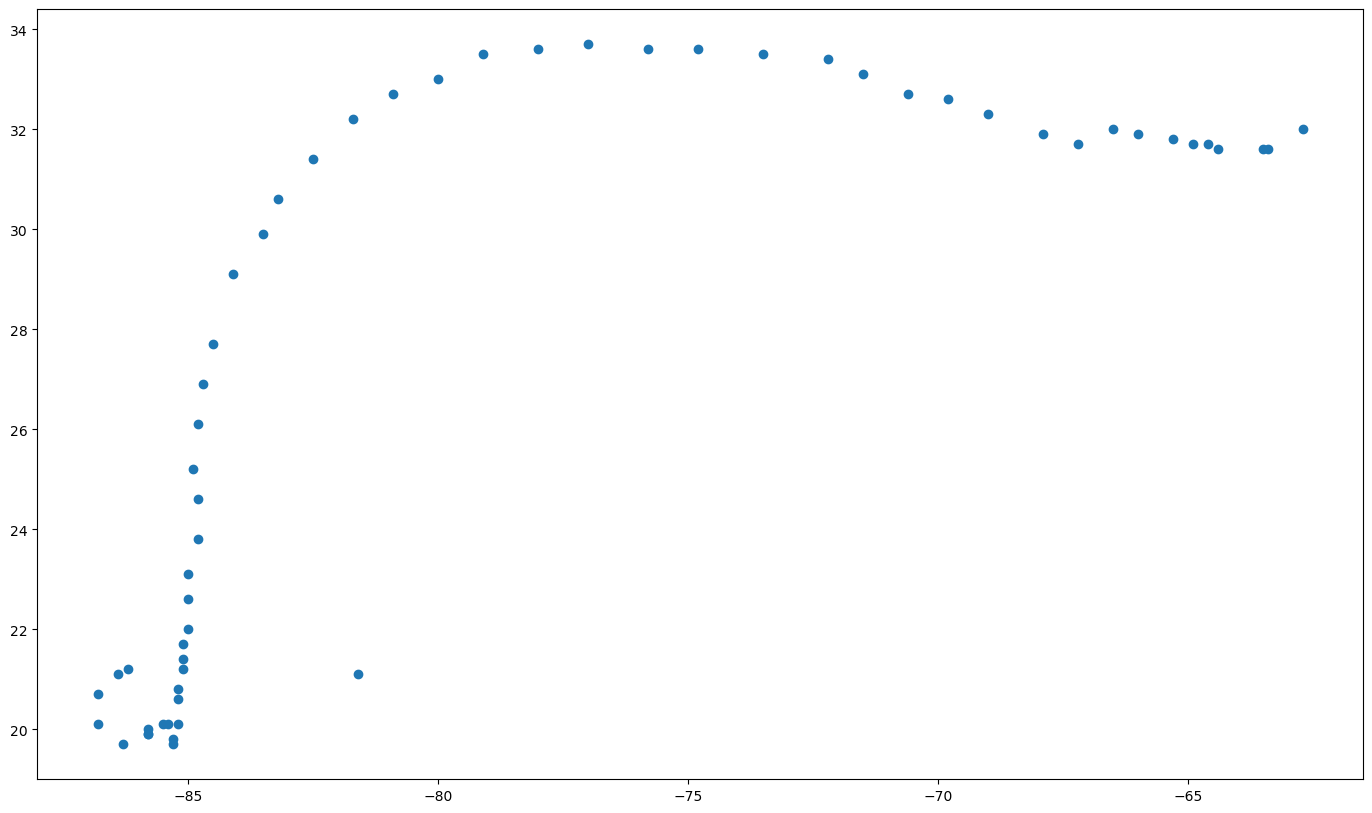

In [173]:
idalia.plot(figsize=(20,10));

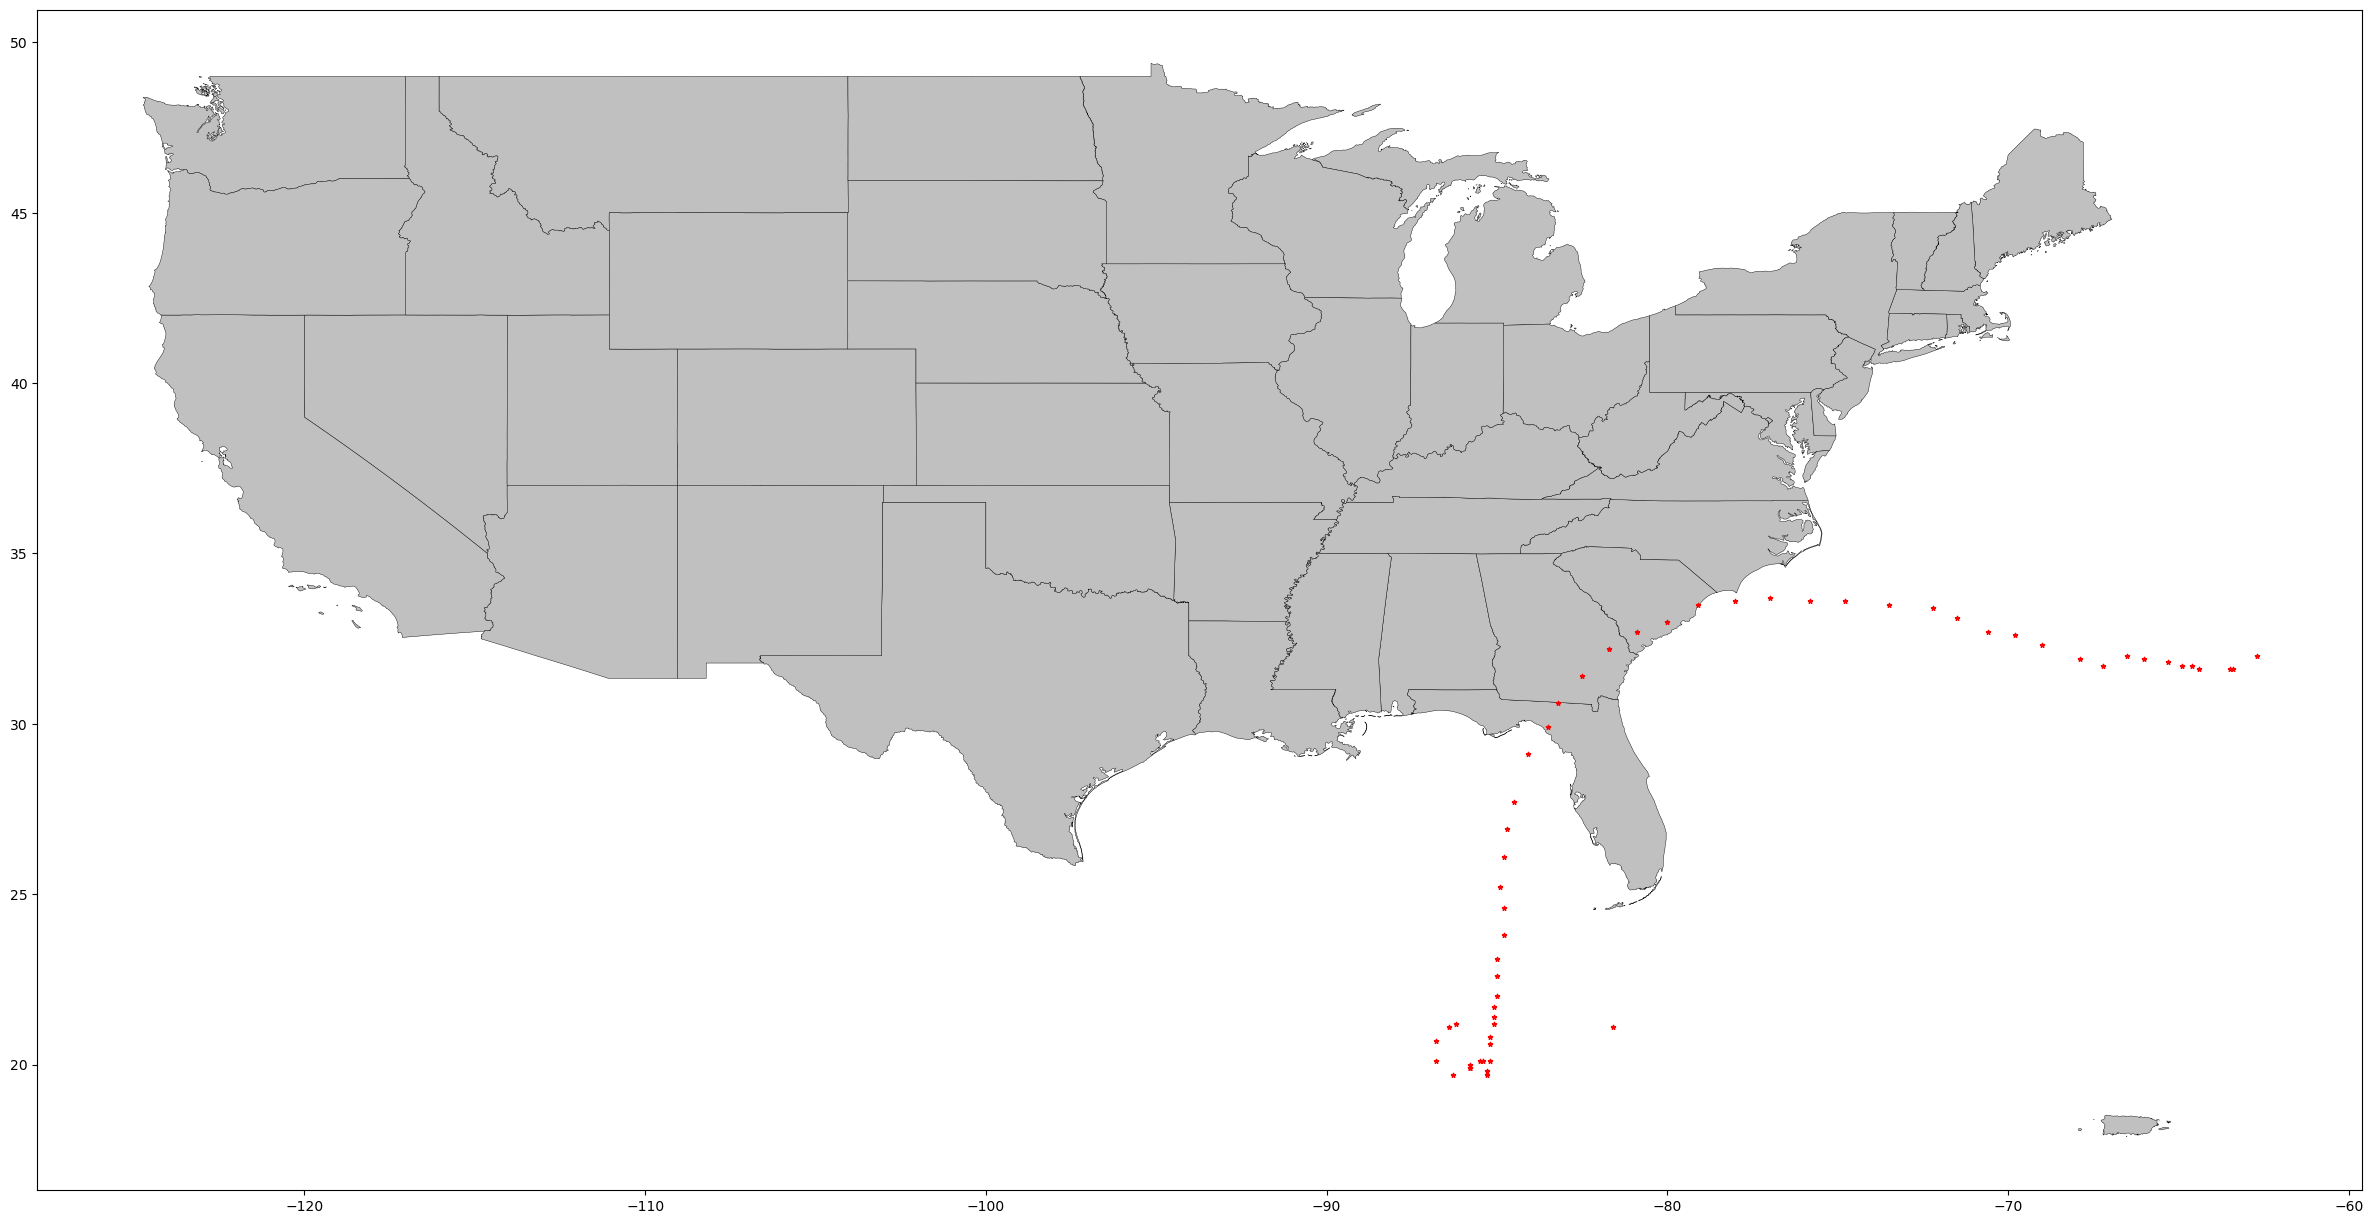

In [174]:
# plotting to see the hurricane overlay the US map

fig, ax = plt.subplots(1, figsize=(30,20))
base = us.plot(ax=ax, linewidth=0.3, facecolor='silver', edgecolor='black')

# plotting the hurricane position on top with red color to stand out:

idalia.plot(ax=base, color='red', marker="*", markersize=10);

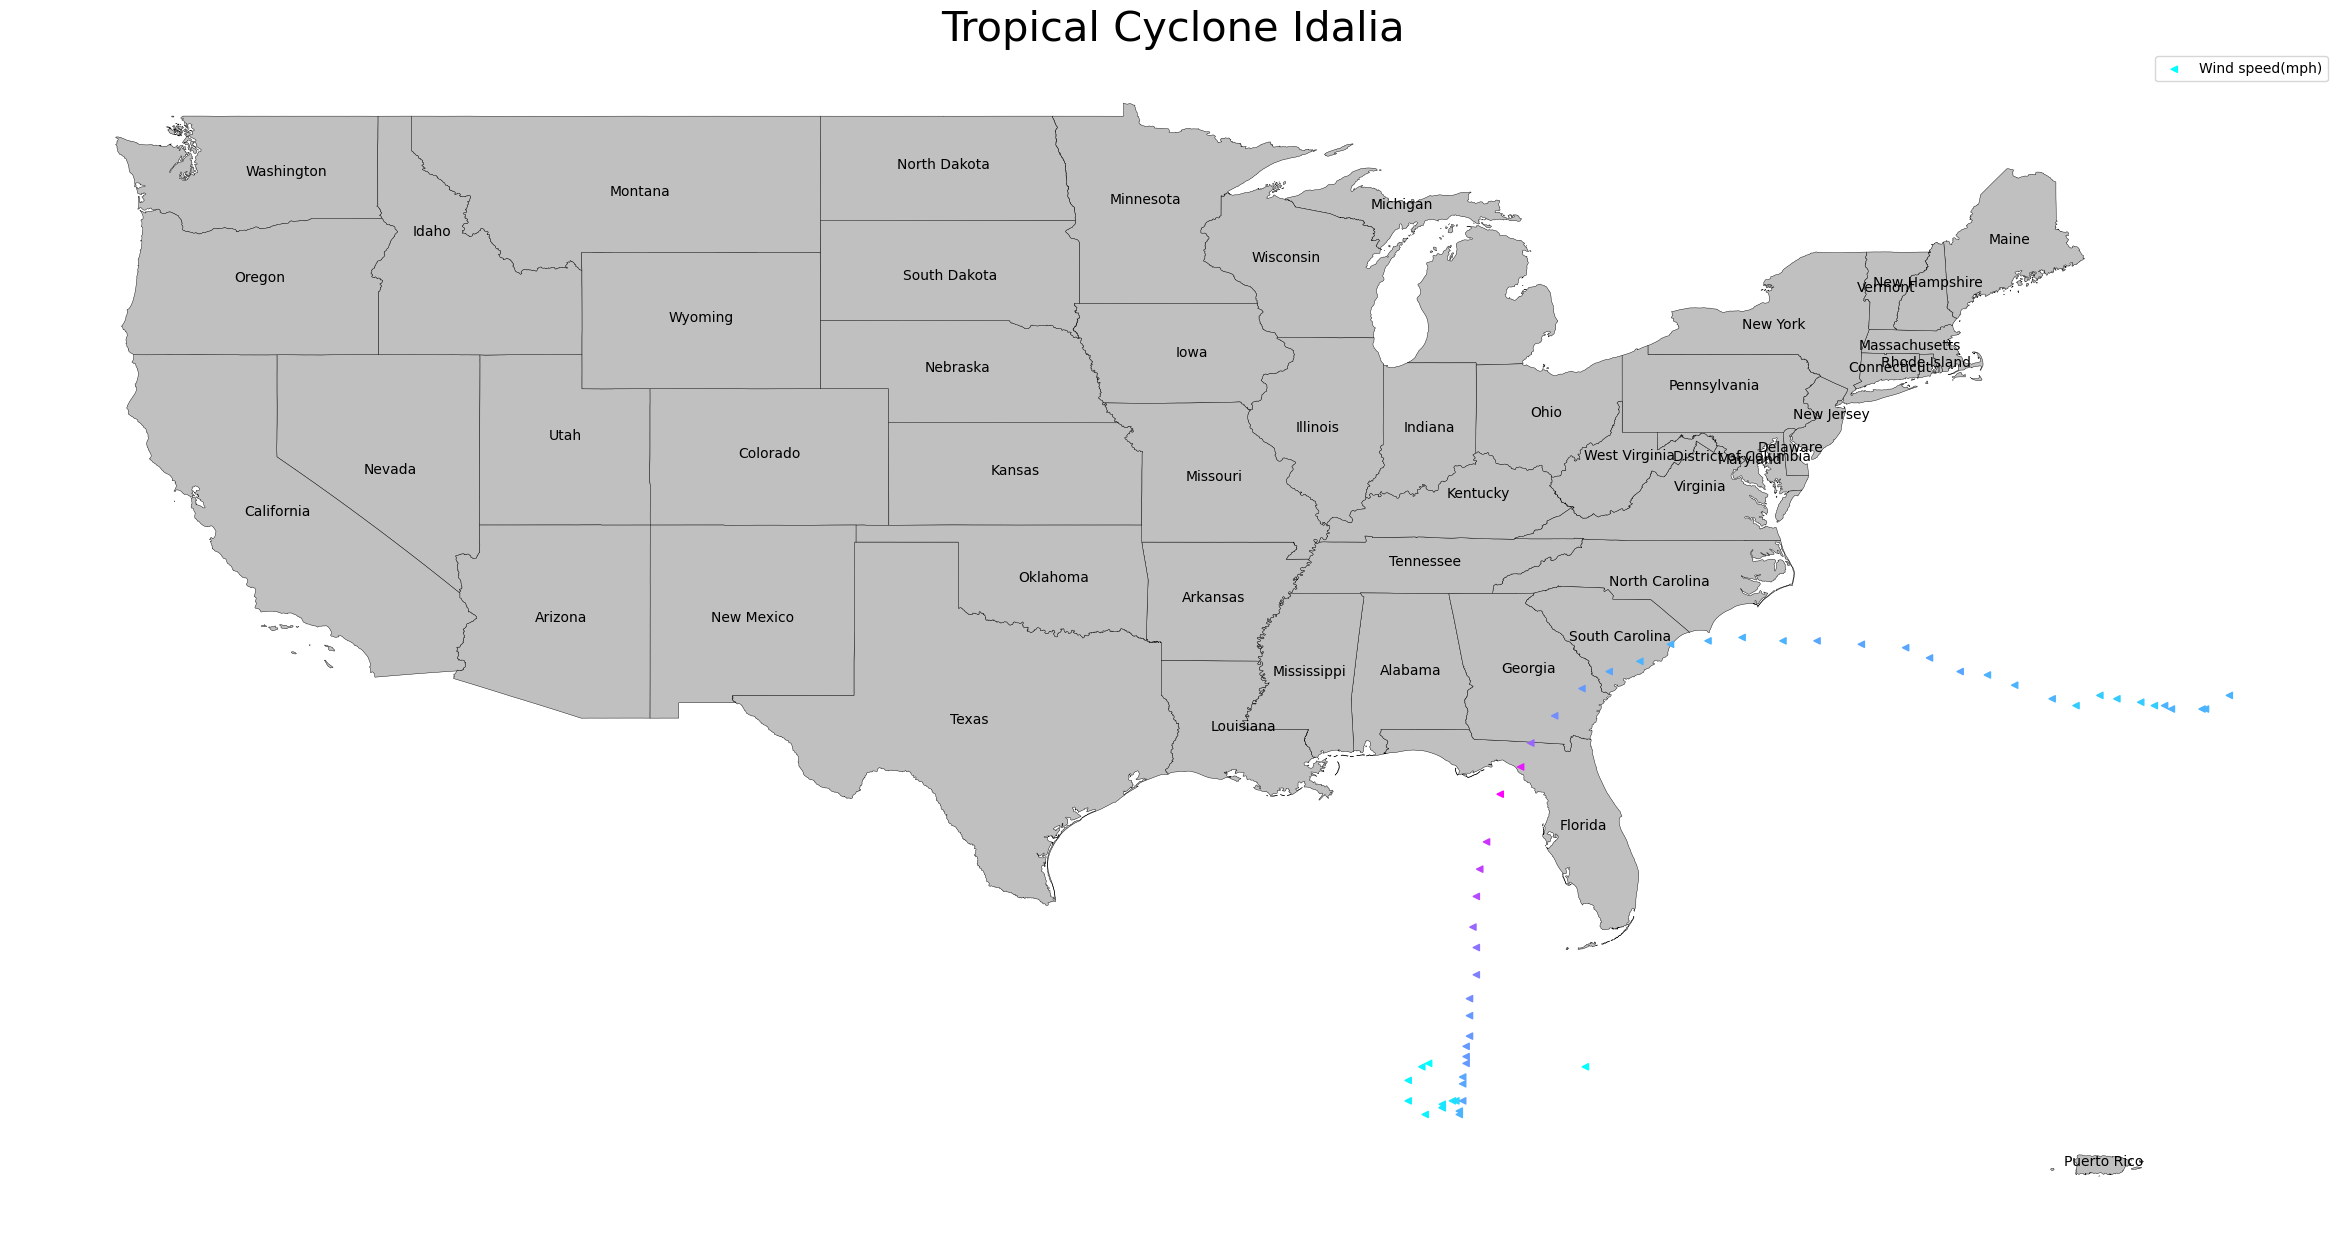

In [193]:
fig, ax = plt.subplots(figsize = (30,20))
base = us.plot(ax=ax, linewidth=0.3, facecolor='silver', edgecolor='black')

us['coords'] = us['geometry'].apply(lambda x: x.representative_point().coords[:])
us['coords'] = [coords[0] for coords in us['coords']]

for idx, row in us.iterrows():
        plt.annotate(text=row['NAME'], xy=row['coords'], horizontalalignment='center', color='black')

idalia.plot(ax=base, column='Wind', marker="<", markersize=20, cmap='cool', label="Wind speed(mph)")
_ = ax.axis('off')
plt.legend()
ax.set_title("Tropical Cyclone Idalia", fontsize=30)
plt.savefig('Hurricane_Idalia_footage.png',bbox_inches='tight');
plt.show()